In [227]:
import numpy as np
from numpy import cos,sin,tan,exp,inf,sqrt,tanh
import scipy as sp
from scipy import integrate
from scipy.integrate import quad,trapezoid
import matplotlib.pyplot as plt
#from timeit import timeit
import timeit

def f_transform(fun,f,lim = None):
    operator_e = lambda w,t:cos(w*t)
    operator_o = lambda w,t:sin(w*t)
    if lim == None:
        even = integrate.quad(lambda t:fun(t)*operator_e(f,t),-np.inf,np.inf)[0]
        odd = integrate.quad(lambda t:fun(t)*operator_o(f,t),-np.inf,np.inf)[0]
    else:
        even = integrate.quad(lambda t:fun(t)*operator_e(f,t),lim[0],lim[1])[0]
        odd = integrate.quad(lambda t:fun(t)*operator_o(f,t),lim[0],lim[1])[0]        
    #return 1/(sqrt(2*pi))*(even - 1j*odd)
    return (even - 1j*odd)

def f_transform_trapezoid(fun,t,f):
    operator_e = lambda w,t:cos(w*t)
    operator_o = lambda w,t:sin(w*t)

    y_even = np.array([fun(i)*operator_e(f,i) for i in t])
    y_odd = np.array([fun(i)*operator_o(f,i) for i in t])

    even = trapezoid(y_even,t) 
    odd = trapezoid(y_odd,t) 
    return (even - 1j*odd)


"""
def time_count(fun,n):
    timecount = timeit("fun()",globals = globals())
    return timecount
""" 
def time_count(fun,message = 'test'):
    start = timeit.default_timer()

    fun()
    stop = timeit.default_timer()
    execution_time = stop - start

    print("Program of " + message+" Executed in "+str(execution_time*1e3) + " [ms]") # It returns time in seconds
    return 0
from scipy.fft import fft,fftshift,fftfreq


test_fun = lambda x,y,z: x+y+z
time_count(lambda :test_fun(1,2,3))


Program of test Executed in 0.0013649987522512674 [ms]


0

In [162]:
test_x = np.linspace(-1,1,100)
test_y = np.array(list(map(lambda x:1 if np.abs(x)<0.5 else 0,test_x)))

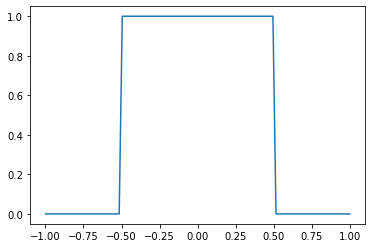

In [163]:
#print(f'{test_x} and {test_y}')
fig,ax = plt.subplots()
ax.plot(test_x,test_y)

Program of main Executed in 0.0006819900590926409 [ms]
(1.0000000000000002, 5.842606996763696e-11)
Program of test_quad Executed in 0.14199399447534233 [ms]
2.0000000000000004
Program of test_quad2 Executed in 0.44680500286631286 [ms]
quad:2.0000000000000004
Program of test_quad3 Executed in 0.5297500028973445 [ms]
quad_trapezoid: 1.9966638903490719
Program of test_quad3_trapezoid Executed in 2.0718919986393303 [ms]
Program of test_ft Executed in 230.87399400537834 [ms]
Program of test_ft_trapezoid Executed in 63.58831899706274 [ms]
(3.1032341449732854, 6.335644904006211e-10)
Program of test_ft2 Executed in 239.48105100134853 [ms]


0

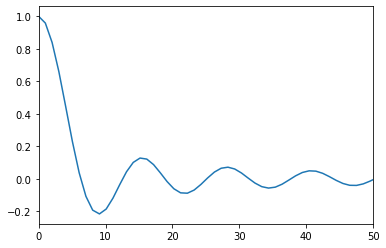

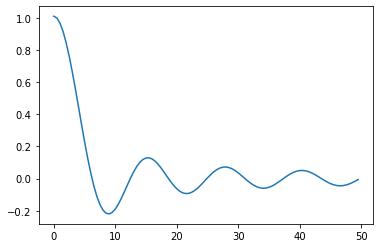

In [188]:
def main():
    0
time_count(main,'main')

def test_quad():
    f = lambda x:exp(-x)
    res = quad(f,0,inf)
    print(res)

#test_quad()
time_count(test_quad,'test_quad')
#print(f'time cost is {time_count(test_quad)} [ms]')

def test_quad2():
    f = lambda x:exp(-np.abs(x))
    res = quad(f,-inf,inf)
    print(res[0])

#test_quad2()
time_count(test_quad2,'test_quad2')

#print(f'time cost is {time_count(test_quad2,100)} [ms]')

def test_quad3():
    f = lambda x:exp(-np.abs(x))
    res = quad(f,-100,100)
    print("quad:"+str(res[0]))

def test_quad3_trapezoid():
    f = lambda x:exp(-np.abs(x))
    x = np.linspace(-100,100,1000)
    #res = quad(f,-1000,1000)
    y = [f(i) for i in x]
    res = trapezoid(y,x=x)
    print("quad_trapezoid: "+str(res))
    
#test_quad3()
time_count(test_quad3,"test_quad3")
time_count(test_quad3_trapezoid,"test_quad3_trapezoid")

#print(f'time cost is {time_count(test_quad3,100)} [ms]')


def test_ft():
    #f = lambda x:exp(-np.abs(x))
    f = lambda x:1 if np.abs(x)<0.5 else 0   
    k = np.linspace(0,100,100)
    F = np.array([f_transform(f,i) for i in k])
    fig,ax = plt.subplots()
    ax.plot(k,F.real)
    ax.set_xlim(0,50)
    return F

def test_ft_trapezoid():
    #f = lambda x:exp(-np.abs(x))
    f = lambda x:1 if np.abs(x)<0.5 else 0
    x,dx = np.linspace(-1,1,100,retstep = True)
    k = np.linspace(0,1/dx,100)
    F = np.array([f_transform_trapezoid(f,x,i) for i in k])
    #F = np.array([f_transform(f,i) for i in k])
    fig,ax = plt.subplots()
    ax.plot(k,F.real)
    return F


#print(f'{test_ft()[:5]}')

time_count(test_ft,"test_ft")

#print(f'{test_ft_trapezoid()[:5]}')
time_count(test_ft_trapezoid,"test_ft_trapezoid")

#print(f'time cost is {time_count(test_ft,100)} [ms]')

def test_ft2():
    #f = lambda x:exp(-np.abs(x))
    f = lambda x:1 if np.abs(x)<0.5 else 0   
    k = np.linspace(0,100,100)
    F = lambda k:f_transform(f,k).real
    sum = quad(F,0,100)
    return sum

print(f'{test_ft2()}')
time_count(test_ft2,"test_ft2")

#print(f'time cost is {time_count(test_ft2,100)} [ms]')


Program of main Executed in 1029.0976270043757 [ms]


0

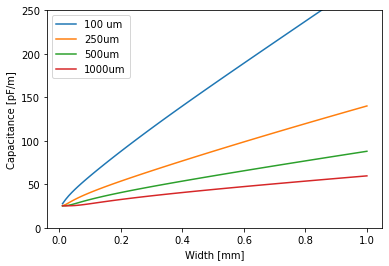

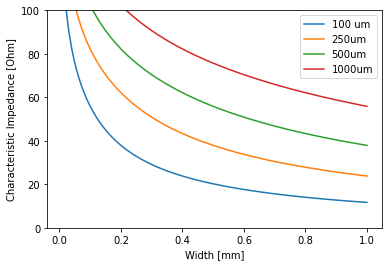

In [199]:
"""
Microstrip Characteristic Impedance quasi-static method 
using Fourier Transform domain
"""
from scipy.fft import fft,fftfreq,fftshift
from numpy import pi
def capacitance(er,h,W):
    
    w,delta_w = np.linspace(-5*W,5*W,100,retstep = True)
    k = np.linspace(-1/delta_w,1/delta_w,100)
    e0 = 8.85e-12
    er = 3
    coth = lambda t:1/tanh(t)
    green = lambda alpha:1/(e0*np.abs(alpha)*(1 + er*coth(np.abs(alpha)*h)))
    phi = lambda alpha:2*sin(alpha*W/2)/(alpha*W/2) - (sin(alpha*W/4)/(alpha*W/4))**2
    phi_x = lambda x: np.abs(x) if np.abs(x) < W/2 else 0 
    #phi_num = np.array([f_transform_trapezoid(phi_x,w,i) for i in k]) #causes 20 [s] of execution time

    #phi_num = np.array([f_transform(phi_x,i,lim = [-W/2,W/2]) for i in k]) #causes 20 [s] of execution time

    # #phi_x(w)
    #f_t = np.array([phi_x(i) for i in w])
    #F_k = fft(f_t)
    #k_fft = fftshift(fftfreq(100,delta_w))
    y = np.array([phi(alpha)*phi(alpha)*green(alpha) for alpha in k])
    #C = 2*pi/(2*np.abs(quad(lambda alpha:phi(alpha)*phi(alpha)*green(alpha),0,np.max(k))[0]))
    C = 2*pi/trapezoid(y,k)
    #C = 2*pi*np.abs(quad(lambda alpha:phi(alpha)*phi(alpha)*green(alpha),0,np.max(k))[0])
    
    """
    print(f'{phi_num}')
    fig,ax = plt.subplots(2,2,figsize = (12,6))
    ax[0,0].plot(k,[green(i) for i in k])
    ax[1,0].plot(k,[phi(i) for i in k])
    ax[1,0].plot(k,phi_num.real/np.max(phi_num.real),'--')
    #ax[0,1].plot(k_fft,F_k.imag)
    
    [ax[0,0].set_ylabel(r'G(\alpha)'),ax[1,0].set_ylabel(r'\phi(\alpha)')]
    
    ax[1,1].plot(w,[phi_x(i) for i in w])
    
    print(f'{F_k}')
    print(f'{k_fft}')
    """
    return C
    
capacitance(3,1e-3,1e-3)


def main():
    w = np.linspace(0.01e-3,1e-3,100)
    h = np.array([0.1e-3,0.25e-3,0.5e-3,1e-3])
    C = np.array([[capacitance(3,i,j) for j in w] for i in h]) 
    fig,ax = plt.subplots()
    [ax.plot(w*1e3,i*1e12) for i in C]
    ax.legend(['100 um','250um','500um','1000um'])
    ax.set_ylim(0,250)
    [ax.set_xlabel('Width [mm]'),ax.set_ylabel('Capacitance [pF/m]')]
    Ca = np.array([[capacitance(1,i,j) for j in w] for i in h]) 

    c_light = 2.9979e8
    frequency = 1e9
    #beta0 = 2*pi*f/c_light
    #beta0 = 2*pi*f/c0
    Z0 = 1/c_light*sqrt(1/Ca/C)
    fig,ax = plt.subplots()
    [ax.plot(w*1e3,i) for i in Z0]
    ax.legend(['100 um','250um','500um','1000um'])
    ax.set_ylim(0,100)
    [ax.set_xlabel('Width [mm]'),ax.set_ylabel('Characteristic Impedance [Ohm]')]

    #C_ratio is 1
    
#time_main()
time_count(main,"main")

#print(f'time cost is {time_count(capacitance(3,1e-3,1e-3),100)} [ms]')
#print(f'time cost is {time_count(main(),100)} [ms]')


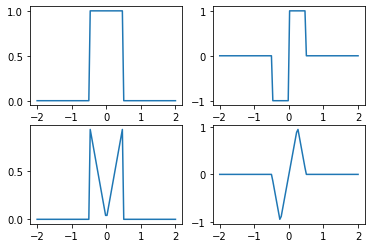

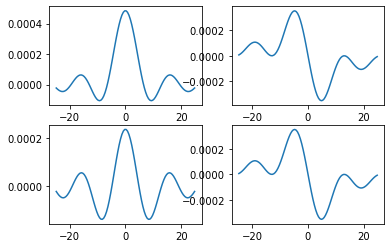

In [235]:
Jz1 = lambda x,W: 1 if (abs(x)<=W/2) else 0
Jz2 = lambda x,W: 2/W*x if (x >= 0 and x < W/2) else -2/W*x if (x < 0 and x > -W/2) else 0
Jx1 = lambda x,W: 1 if (x >= 0 and x < W/2) else -1 if (x < 0 and x > -W/2) else 0
Jx2 = lambda x,W: 4/W*x if (x >= -W/4 and x < W/4) else -4*x/W - 2 if (-W/2 < x <-W/4) else -4*x/W + 2  if (x < W/2 and x > W/4) else 0 

W = 0.5e-3
x,dx = np.linspace(-2*W,2*W,100,retstep = True)
k = np.linspace(-1/dx,1/dx,100)

Jz1_alpha = lambda k:f_transform_trapezoid(lambda x:Jz1(x,W),x,k)
Jz2_alpha = lambda k:f_transform_trapezoid(lambda x:Jz2(x,W),x,k)
Jx1_alpha = lambda k:f_transform_trapezoid(lambda x:Jx1(x,W),x,k)
Jx2_alpha = lambda k:f_transform_trapezoid(lambda x:Jx2(x,W),x,k)




Jz1_alpha = np.array([Jz1_alpha(i) for i in k])
Jz2_alpha = np.array([Jz2_alpha(i) for i in k])
Jx1_alpha = np.array([Jx1_alpha(i) for i in k])
Jx2_alpha = np.array([Jx2_alpha(i) for i in k])

#Jz2_alpha = np.array([f_transform_trapezoid(lambda x:Jz2(x,W),x,i) for i in k])
##Jx1_alpha = np.array([f_transform_trapezoid(lambda x:Jx1(x,W),x,i) for i in k])
#Jx2_alpha = np.array([f_transform_trapezoid(lambda x:Jx2(x,W),x,i) for i in k])

#Jz2_alpha = 
#f_transform_trapezoid(fun,t,f):

fig,ax = plt.subplots(2,2)
ax[0,0].plot(x/W,[Jz1(i,W) for i in x])
ax[1,0].plot(x/W,[Jz2(i,W) for i in x])
ax[0,1].plot(x/W,[Jx1(i,W) for i in x])
ax[1,1].plot(x/W,[Jx2(i,W) for i in x])

fig,ax = plt.subplots(2,2)
ax[0,0].plot(k*W,Jz1_alpha.real)
ax[1,0].plot(k*W,Jz2_alpha.real)
ax[0,1].plot(k*W,Jx1_alpha.imag)
ax[1,1].plot(k*W,Jx1_alpha.imag)

In [262]:
import time
#from scipy.integrate import fsolve
from scipy.optimize import newton, fsolve,brentq#newto[func,x0],fsolve[func,x0] brentq[f,a,b]
#function = lambda x:(x-1)**2
def function(x):
    time.sleep(0.3)
    return (x-1)**2
def main_newton(function):
    #time.sleep(3) # Sleep for 3 seconds
    res = newton(function,0)
    print(str(res))
    return 0
time_count(lambda:main_newton(function),'newton')

def main_fsolve(function):
    #time.sleep(3) # Sleep for 3 seconds
    res = fsolve(function,0)
    print(str(res))
    return 0
time_count(lambda:main_fsolve(function),'fsolve')



0.9999999841893239
Program of newton Executed in 11504.270589997759 [ms]
[1.]
Program of fsolve Executed in 23872.742805993767 [ms]


0

Program of microstrip analysis Executed in 17100.583373001427 [ms]


0

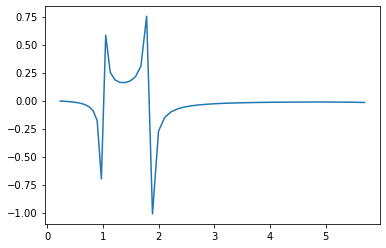

In [284]:
W = 3.17e-3
er = 11.7
e0 = 8.85e-12
u0 = 4*pi*1e-7
ur = 1
freq = 10e9
omega = 2*pi*freq
k1 = sqrt(omega**2*er*ur*e0*u0)
k2 = sqrt(omega**2*e0*u0)
k0 = k2
h = 1e-3
from numpy import tanh
coth = lambda x:1/tanh(x)
x,dx = np.linspace(-2*W,2*W,100,retstep = True)
alpha_var = np.linspace(-1/dx,1/dx,100)

#what's global variables:x,dx
def G_dyadic(alpha,beta):
    #k0,k1,k2,gamma1,gamma2,er known
    gamma1 = alpha**2 + beta**2 - k1**2
    gamma2 = alpha**2 + beta**2 - k2**2
    b11 = 1j*alpha*((k0**2 - beta**2)/(k1**2 - beta**2) - 1)
    b12 = omega*u0*gamma1/beta*(gamma2/gamma1  + (k0**2 - beta**2)/(k1**2 - beta**2)*tanh(gamma1*h))
    b21 = omega*e0*gamma1/beta*(gamma2/gamma1 + er*(k2**2 - beta**2)/(k1**2 - beta**2)*coth(gamma1*h))
    b22 = -b11
    det = b11*b22 - b12*b21
    F1 = omega*u0*gamma1*tanh(gamma1*h)/(1j*(k0**2 - beta**2))


    G11 = 1/det*(F1*b22 + alpha*beta/(k1**2 - beta**2)*b12)
    G12 = b12/det
    G21 = gamma2/det*(F1*b21 + alpha*beta/(k1**2 - beta**2)*b11)
    G22 = gamma2*b11/det
    

    Jz1 = lambda x,W: 1 if (abs(x)<=W/2) else 0
    Jz2 = lambda x,W: 2/W*x if (x >= 0 and x < W/2) else -2/W*x if (x < 0 and x > -W/2) else 0
    Jx1 = lambda x,W: 1 if (x >= 0 and x < W/2) else -1 if (x < 0 and x > -W/2) else 0
    Jx2 = lambda x,W: 4/W*x if (x >= -W/4 and x < W/4) else -4*x/W - 2 if (-W/2 < x <-W/4) else -4*x/W + 2  if (x < W/2 and x > W/4) else 0 

    #Jz1_(alpha)
    Jz1_alpha = lambda k:f_transform_trapezoid(lambda x:Jz1(x,W),x,k) 
    Jz2_alpha = lambda k:f_transform_trapezoid(lambda x:Jz2(x,W),x,k)
    Jx1_alpha = lambda k:f_transform_trapezoid(lambda x:Jx1(x,W),x,k)
    Jx2_alpha = lambda k:f_transform_trapezoid(lambda x:Jx2(x,W),x,k)

    K11 = Jz1_alpha(alpha)*G11*Jx1_alpha(alpha) 
    K12 = Jz1_alpha(alpha)*G12*Jx2_alpha(alpha) 
    K21 = Jz2_alpha(alpha)*G21*Jx1_alpha(alpha) 
    K22 = Jz2_alpha(alpha)*G22*Jx2_alpha(alpha) 
    
    return [[K11,K12],[K21,K22]]

    #return np.array([[G11,G12],[G21,G22]]) #alpha

from numpy.linalg import det

def K_matrix(beta):
    K = np.array([G_dyadic(i,beta) for i in alpha_var]).transpose(2,0,1) #100x2x2 -> 2x2x100
    K11_sum = trapezoid(K[0,0],alpha_var)
    K12_sum = trapezoid(K[0,1],alpha_var)
    K21_sum = trapezoid(K[1,0],alpha_var)
    K22_sum = trapezoid(K[1,1],alpha_var)
    K_sum =  np.array([[K11_sum,K12_sum],[K21_sum,K22_sum]])
    return det(K_sum)
def main():
    #beta_res = newton(lambda x:np.abs(K_matrix(x)),x0 = 1000)
    #K_res = K_matrix(1000)
    beta = np.linspace(100,500,50)
    #print(str(np.abs(K_matrix(1))))
    fig,ax = plt.subplots()
    ax.plot((beta/(2*pi*freq)*3e8)**2,[K_matrix(i).imag*freq for i in beta])
    #ax.set_ylim(0,1)
    return 0

time_count(lambda:main(),'microstrip analysis')


In [280]:
print(str(K_matrix(10000)))

(9.540788308939063e-13+2.6479064377566026e-13j)
